In [138]:
import numpy as np
# 输入对应值大小，x为房屋大小，y为放假
x = np.array([56, 72, 69, 88, 102, 86, 75, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

Text(0,0.5,'Price')

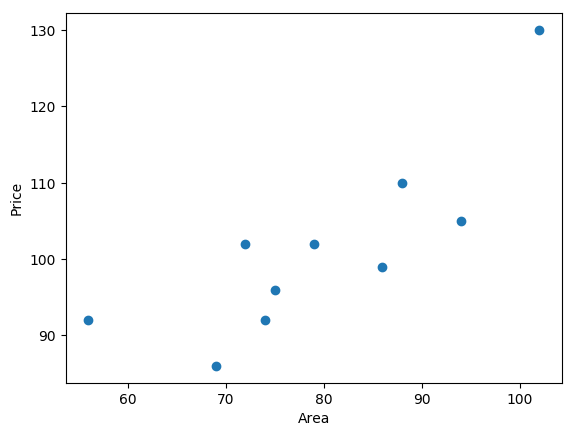

In [139]:
from matplotlib import pyplot as plt
# 绘制图像
plt.scatter(x, y)
plt.xlabel('Area') # x轴标签为房屋面积
plt.ylabel('Price') # y轴标签为房价

## 1.一元线性组合

In [140]:
# 定义一次函数
def f(x, w0, w1):
    y = w0 + w1 * x
    return y

# 定义平方损失函数
def square_loss(x, y, w0, w1):
    loss = sum(np.square(y - (w0 +w1 * x)))
    return loss

# 计算w1, w2
def w_calculator(x, y):
    n = len(x)
    w1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x * x) - sum(x) * sum(x))
    w0 = (sum(x * x) * sum(y) - sum(x) * sum(x * y)) / (n * sum(x * x) - sum(x) * sum(x))
    return w0, w1

In [141]:
w_calculator(x, y)

(41.44592314901593, 0.7541393314589191)

In [142]:
w0, w1 = w_calculator(x, y)
square_loss(x, y, w0, w1)

444.1538269290844

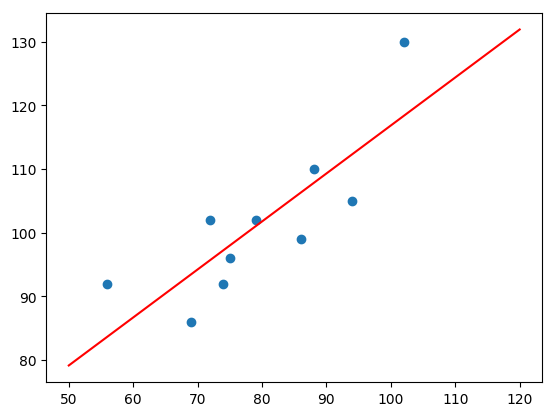

In [143]:
# 绘制图像
x_temp = np.linspace(50, 120, 100)
# 取50-120之间100个点
plt.scatter(x, y) # 绘制原始数据
plt.plot(x_temp, x_temp * w1 + w0, 'r')

In [144]:
# 带回方程
f(150, w0, w1)

154.5668228678538

## 2.sklearn 线性回归

In [145]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 创建线性回归模型
model.fit(x.reshape(len(x), 1), y) # 将x转化为列向量，利用x,y训练模型

model.intercept_, model.coef_ # 斜率、截距

(41.44592314901596, array([0.75413933]))

## 3.最小二乘法矩阵形式

In [146]:
# 定义W=(X^T X)^-1 X^T y
def w_matrix(x, y):
    w = (x.T * x).I * x.T * y
    return w

# 将x转化为[1, x]格式
x = np.matrix([[1, 56], [1, 72], [1, 69], [1, 88], [1, 102],
               [1, 86], [1, 76], [1, 79], [1, 94], [1, 74]])
y = np.matrix([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

w_matrix(x, y.reshape(10, 1))

matrix([[41.33509169],
        [ 0.75458428]])

In [147]:
import pandas as pd
 
df = pd.read_csv('boston.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [148]:
# 特征
features = df[['crim', 'rm', 'lstat']]
features.describe()

,crim,rm,lstat
count,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063
std,8.601545,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.677082,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [149]:
# 分割数据集
# 房价中间值为目标值
target = df['medv']
split_num = int(len(features) * 0.7)

X_train = features[:split_num]
y_train = target[:split_num]

X_test = features[split_num:]
y_test = target[split_num:]

In [150]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([ 0.69979497, 10.13564218, -0.20532653]), -38.00096988969026)

In [151]:
# 预测
preds = model.predict(X_test)
preds

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368,
       24.3286313 , 28.4257879 , 25.12834727, 16.82806601, 20.76498858,
       52.3350748 , -0.18169806, 12.01475786,  7.87878077, 15.13155699,
       32.93748235, 37.07872049, 29.50613719, 25.50800832, 12.35867972,
        9.08901644, 47.08374238, 35.31759193, 33.3738765 , 38.34913316,
       33.10414639, 91.3556125 , 35.11735022, 19.69326952, 18.49805269,
       14.03767555, 20.9235166 , 20.41406182, 21.92218226, 15.20451678,
       18.05362998, 21.26289453, 23.18192502, 15.87149504, 27.70381826,
       27.65958772, 30.17151829, 27.04987446, 21.52730227, 37.82614512,
       22.09872387, 34.71166346, 32.07959454, 29.45253042, 29.51137956,
       41.49935191, 62.4121152 , 13.64508882, 24.71242033, 18.69151684,
       37.4909413 , 54.05864658, 34.94758034, 15.01355249, 30.17849355,
       32.22191275, 33.90252834, 33.02530285, 28.4416789 , 69.60201087,
       34.7617152 , 31.65353442, 24.5644437 , 24.78130285, 24.00

## 4.评价指标

In [152]:
import numpy as np
# 平均绝对误差
def mae_value(y_true, y_pred):
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred)) / n
    return mae
# 均方绝对误差
def mse_value(y_true, y_pred):
    n = len(y_true)
    mse = sum(np.square(y_true, y_pred)) / n
    return mse

In [153]:
mae = mae_value(y_test.values, preds)
mse = mse_value(y_test.values, preds)

print('MAE:', mae)
print('MSE:', mse)

MAE: 13.068102215563238
MSE: 343.7878947368422
